In [ ]:
#IMPORTING LIBRARIES
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import pandas as pd
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as Data
import matplotlib.pyplot as plt
from torch.optim import Adam, SGD
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input, LSTM
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization
import keras
from matplotlib.pyplot import figure
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#LOADING DATA
data = pd.read_csv('DL_data.csv')
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17.0,-15.0,-31.0,-77.0,-103.0,-127.0,-116.0,-83.0,-51.0,4.0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164.0,150.0,146.0,152.0,157.0,156.0,154.0,143.0,129.0,1.0
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57.0,64.0,48.0,19.0,-12.0,-30.0,-35.0,-35.0,-36.0,5.0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82.0,-81.0,-80.0,-77.0,-85.0,-77.0,-72.0,-69.0,-65.0,5.0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4.0,2.0,-12.0,-32.0,-41.0,-65.0,-83.0,-89.0,-73.0,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4744 entries, 0 to 4743
Columns: 180 entries, Unnamed to y
dtypes: float64(102), int64(77), object(1)
memory usage: 6.5+ MB


In [ ]:
#Splitting the data into features (X) and labels (y)
X = data.iloc[:,1:-1].values
X.shape

(4744, 178)

In [ ]:
y = data.iloc[:,-1:].values
y[y>1] = 0
y.shape

(4744, 1)

In [ ]:
#Splitting the Dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)
X_train.shape,y_test.shape

((3558, 178), (1186, 1))

In [ ]:
#CREATING MODEL
def denseBlock(dims,inp) :
    x = tf.keras.layers.BatchNormalization() (inp)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(178,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    return x

In [ ]:
inp = tf.keras.layers.Input(shape=(178,),name='input')
x1 = denseBlock(256,inp)
x2 = denseBlock(512,inp)
x3 = denseBlock(1024,inp)
x = tf.keras.layers.Concatenate()([x1,x2,x3])
x = tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
out = tf.keras.layers.Dense(1,activation='sigmoid',name='output') (x)

model = tf.keras.models.Model(inp,out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 178)]                0         []                            
                                                                                                  
 batch_normalization_3 (Bat  (None, 178)                  712       ['input[0][0]']               
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_4 (Bat  (None, 178)                  712       ['input[0][0]']               
 chNormalization)                                                                                 
                                                                                            

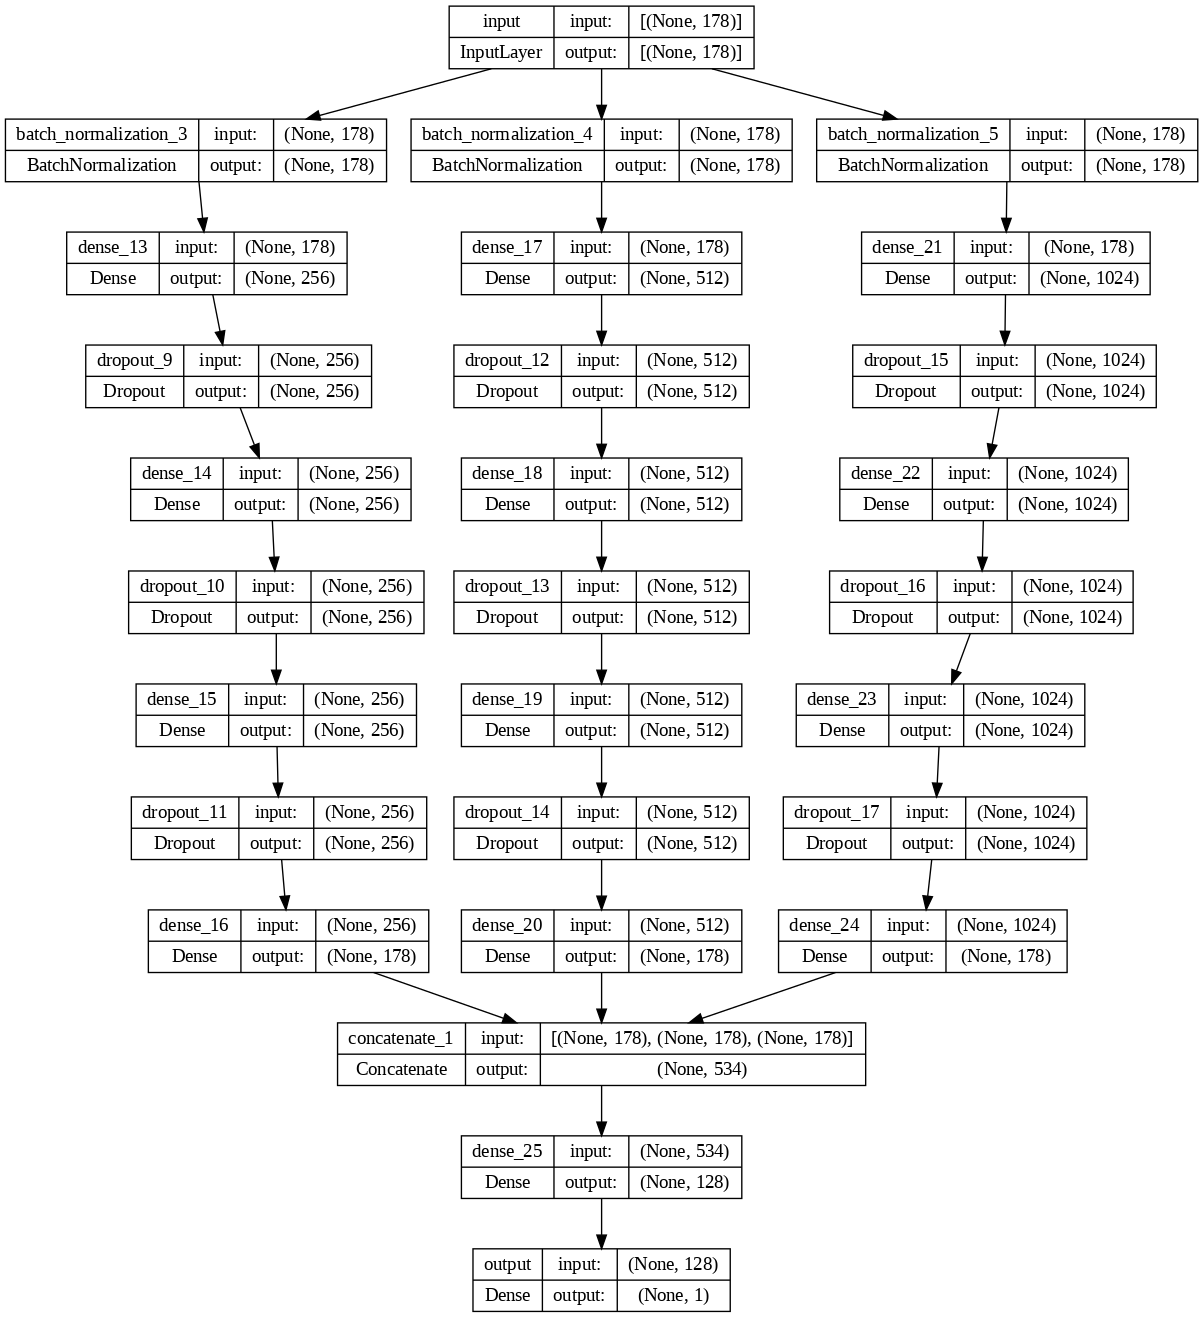

In [ ]:
#MODEL VISUALIZATION
tf.keras.utils.plot_model(model,show_shapes=True, dpi=98)

In [ ]:
#TRAINING MODEL
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=150,batch_size=128,validation_split=0.2)

Epoch 1/150
23/23 [==============================] - 4s 78ms/step - loss: 0.6941 - accuracy: 0.5639 - val_loss: 0.6019 - val_accuracy: 0.8287
Epoch 2/150
23/23 [==============================] - 2s 80ms/step - loss: 0.6062 - accuracy: 0.7871 - val_loss: 0.5082 - val_accuracy: 0.8722
Epoch 3/150
23/23 [==============================] - 2s 85ms/step - loss: 0.5098 - accuracy: 0.8696 - val_loss: 0.4225 - val_accuracy: 0.9045
Epoch 4/150
23/23 [==============================] - 2s 71ms/step - loss: 0.4186 - accuracy: 0.9076 - val_loss: 0.3300 - val_accuracy: 0.9382
Epoch 5/150
23/23 [==============================] - 2s 67ms/step - loss: 0.3152 - accuracy: 0.9322 - val_loss: 0.2738 - val_accuracy: 0.9354
Epoch 6/150
23/23 [==============================] - 2s 66ms/step - loss: 0.2545 - accuracy: 0.9325 - val_loss: 0.2241 - val_accuracy: 0.9551
Epoch 7/150
23/23 [==============================] - 2s 70ms/step - loss: 0.2205 - accuracy: 0.9378 - val_loss: 0.2183 - val_accuracy: 0.9551
Epoch 

38/38 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.9654


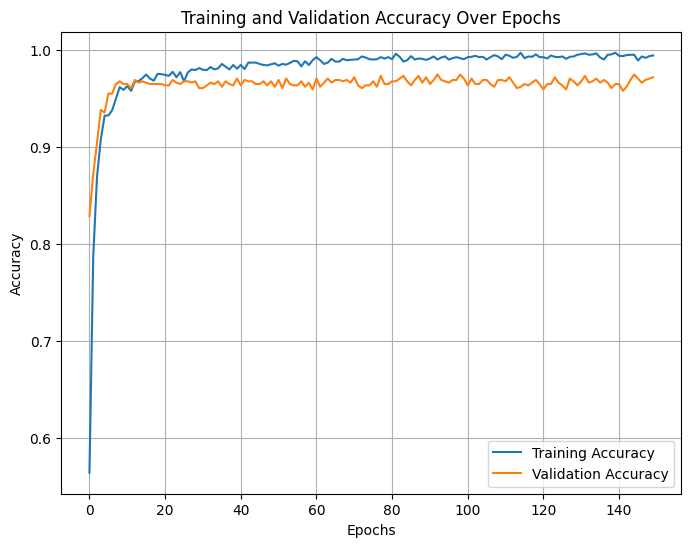

In [ ]:
#MODEL EVALUATION
model.evaluate(X_test,y_test)
# Plotting the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid()
plt.show()

APPLYING CNN MODEL

In [ ]:
#READING DATA
raw_data = pd.read_csv('DL_data.csv')
raw_data.head()
data = raw_data.values
data = data[1:11501, 1:180]
data.shape

(11499, 179)

In [ ]:
#Splitting your data into categories based on the values in the last column and then converting these subsets to integer data types.
D = data
df_1 = D[D[:, 178]==1]
df_2 = D[D[:, 178]==2]
df_3 = D[D[:, 178]==3]
df_4 = D[D[:, 178]==4]
df_5 = D[D[:, 178]==5]

print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)
print(df_5.shape)

df_1 = df_1.astype(int)
df_2 = df_2.astype(int)
df_3 = df_3.astype(int)
df_4 = df_4.astype(int)

(2300, 179)
(2300, 179)
(2300, 179)
(2299, 179)
(2300, 179)


In [ ]:
df_3[:, 178] = df_3[:, 178] - 3
D1 = np.concatenate([df_1, df_3])

In [ ]:
#Splitting data into training, validation, and test sets
number_of_rows = D1.shape[0]

random_indices = np.random.choice(number_of_rows, size=int(number_of_rows*0.8), replace=False)

label_train = D1[random_indices, -1]
data_train = D1[random_indices, :-1]

D1_rest = np.delete(D1, random_indices, 0)

number_of_rows = D1_rest.shape[0]
random_indices = np.random.choice(number_of_rows, size=int(number_of_rows*0.5), replace=False)

label_val = D1_rest[random_indices, -1]
data_val = D1_rest[random_indices, :-1]

D1_rest_rest = np.delete(D1_rest, random_indices, 0)
label_test = D1_rest_rest[:, -1]
data_test = D1_rest_rest[:, :-1]

data_train = np.expand_dims(data_train, axis=2)
data_val = np.expand_dims(data_val, axis=2)
data_test = np.expand_dims(data_test, axis=2)

print(label_train.shape, data_train.shape)
print(label_val.shape, data_val.shape)
print(label_test.shape, data_test.shape)

(3680,) (3680, 178, 1)
(460,) (460, 178, 1)
(460,) (460, 178, 1)


In [ ]:
#Defining the evaluation model
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model - Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['1','2', '3']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
# Defining CNN network
def network_CNN(X_train,y_train):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1d_1 = layers.Conv1D(filters=32, kernel_size=6)(inputs_cnn)
    batch_normalization = BatchNormalization()(conv1d_1)
    max_pooling1d = layers.MaxPooling1D( 2, padding='same')(batch_normalization)
    conv1d_2 = layers.Conv1D(filters=64, kernel_size=3)(max_pooling1d)
    batch_normalization_1 = BatchNormalization()(conv1d_2)
    max_pooling1d_1 = layers.MaxPooling1D(2, padding='same')(batch_normalization_1)
    flatten = Flatten()(max_pooling1d_1)
    dense = Dense(32)(flatten)
    dense_1 = Dense(16)(dense)
    main_output = Dense(2)(dense_1)
    model1 = Model(inputs= inputs_cnn, outputs=main_output)
    model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

    return(model1)

In [ ]:
model1 = network_CNN(data_train,label_train)
print(model1.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_cnn (InputLayer)     [(None, 178, 1)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 173, 32)           224       
                                                                 
 batch_normalization_8 (Bat  (None, 173, 32)           128       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 87, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 85, 64)            6208      
                                                                 
 batch_normalization_9 (Bat  (None, 85, 64)            256 

In [ ]:
#TRAINING DATA
save_path = '/tmp/checkpoint_1'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=save_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model1.fit(data_train, label_train,epochs=100, batch_size=32, validation_data=(data_val,label_val), callbacks=[model_checkpoint_callback])

Epoch 1/100
115/115 [==============================] - 4s 13ms/step - loss: 0.8501 - accuracy: 0.8250 - val_loss: 0.9884 - val_accuracy: 0.8109
Epoch 2/100
115/115 [==============================] - 1s 11ms/step - loss: 0.6357 - accuracy: 0.8255 - val_loss: 0.5489 - val_accuracy: 0.8478
Epoch 3/100
115/115 [==============================] - 1s 10ms/step - loss: 0.5963 - accuracy: 0.8329 - val_loss: 0.5359 - val_accuracy: 0.8370
Epoch 4/100
115/115 [==============================] - 1s 11ms/step - loss: 0.6367 - accuracy: 0.8367 - val_loss: 0.5642 - val_accuracy: 0.8457
Epoch 5/100
115/115 [==============================] - 1s 11ms/step - loss: 0.6153 - accuracy: 0.8389 - val_loss: 0.5895 - val_accuracy: 0.8652
Epoch 6/100
115/115 [==============================] - 2s 15ms/step - loss: 0.6136 - accuracy: 0.8633 - val_loss: 0.6905 - val_accuracy: 0.8826
Epoch 7/100
115/115 [==============================] - 1s 12ms/step - loss: 0.6013 - accuracy: 0.8679 - val_loss: 0.6327 - val_accuracy:

Accuracy: 78.04%


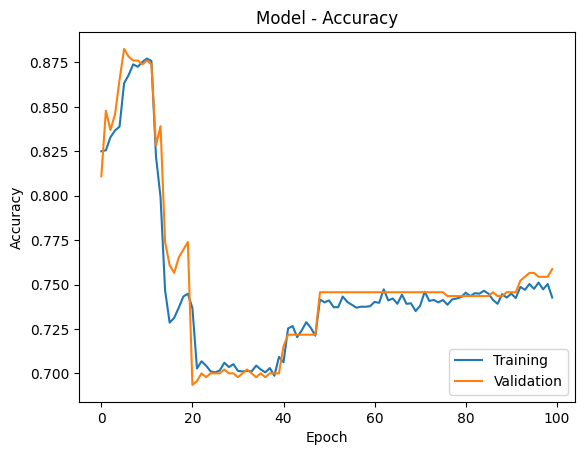

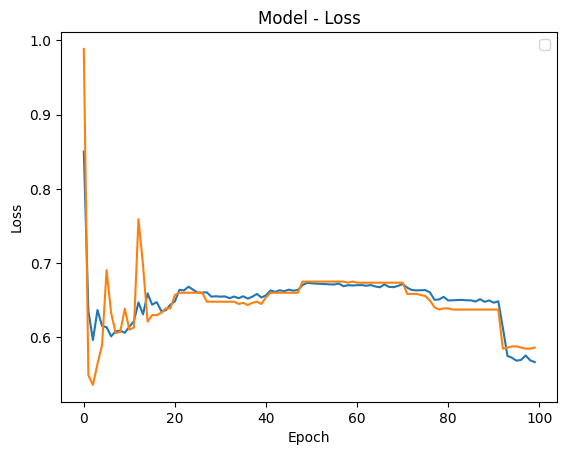

15/15 [==============================] - 0s 5ms/step


In [ ]:
# Plotting the training and validation accuracy and loss
evaluate_model(history,data_test,label_test,model1)
y_pred=model1.predict(data_test)